### 1.Import

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

1.1 Models

In [96]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Naive Bayes': GaussianNB(),
    # 'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    # 'SVM': SVC(random_state=42)
}

### 2.Load dataset

In [97]:
path=r"C:\Users\mrtat\Downloads\NTI\Data\cardio_train.csv"

In [98]:
df = pd.read_csv(path,sep=';')

2.1.Show Data

In [99]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [100]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [101]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 3.Preprocessing

3.1Handle missing values

In [103]:
df.isna().sum().sort_values(ascending=False)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

3.2 Handle duplicated

In [104]:
df.duplicated().sum()

0

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
df.drop(['id'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True) # Reset index after dropping columns and removing duplicates

In [107]:
df.shape

(70000, 12)

In [108]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

3.3 Label Encode to all data

In [109]:
for c in X.select_dtypes(include=['object']).columns:
    lb = LabelEncoder()
    df[c] = lb.fit_transform(df[c])


4.1 Data before balance

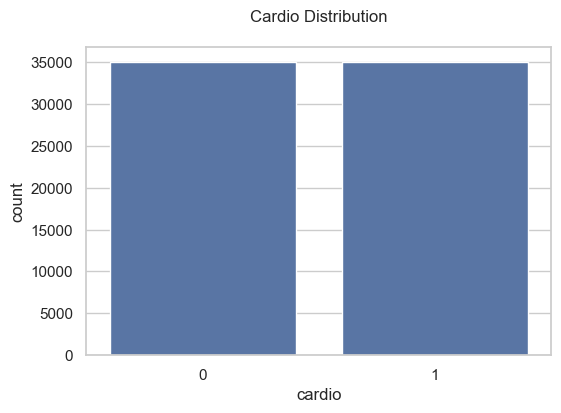

In [110]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df)
plt.title('Cardio Distribution\n')
plt.show()

In [111]:
print(df['cardio'].value_counts())
print(df['cardio'].value_counts(normalize=True))  # Shows percentages

cardio
0    35021
1    34979
Name: count, dtype: int64
cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64


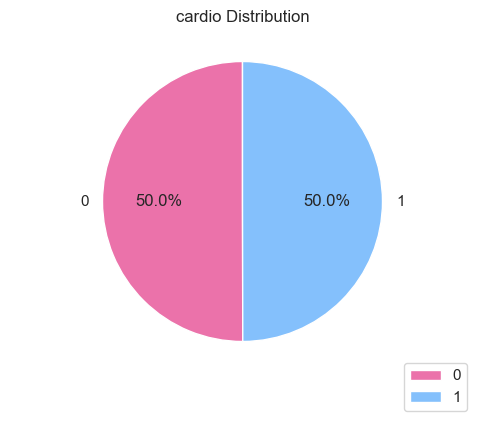

In [112]:
revenue_counts = df['cardio'].value_counts()
revenue_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc"],  # Custom colors for the pie chart    
)

plt.title('cardio Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=revenue_counts.index, bbox_to_anchor=(1, 0))
plt.ylabel('')  # Hide y-label
plt.show()

3.3 Split data

In [113]:
x_train1, x_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train1)
x_test = scaler.transform(x_test1)

In [115]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train2, y_train)
# Resampling the data to balance the classes

df_balanced = pd.DataFrame(x_train, columns=X.columns)
df_balanced['cardio'] = y_train



### 4.Visulization

4.2 Data after balance

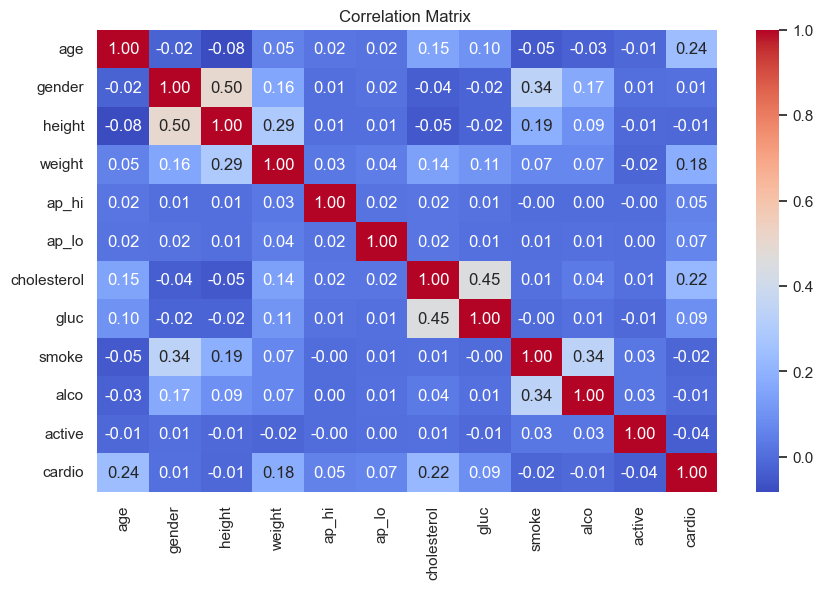

In [118]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix ')
plt.xticks(rotation=90)
plt.show()

### 5.Train model

In [119]:
results = {}
# models from 1.1 part
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [120]:
metrics_df = pd.DataFrame(results).T
metrics_df.index.name = 'Model'
print("\nPerformance Metrics:\n", metrics_df)


Performance Metrics:
                      Accuracy  Precision    Recall  F1-Score
Model                                                       
Logistic Regression  0.723000   0.744309  0.680833  0.711157
Decision Tree        0.631571   0.630637  0.638192  0.634392
Random Forest        0.712429   0.717829  0.701654  0.709650
AdaBoost             0.736214   0.773619  0.669139  0.717596


In [121]:
best_model_name = metrics_df['F1-Score'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model based on F1-Score: {best_model_name}\n")


Best Model based on F1-Score: AdaBoost



### confusion Matrix & Classification Report for Best Model

In [122]:
y_pred_best = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_best)

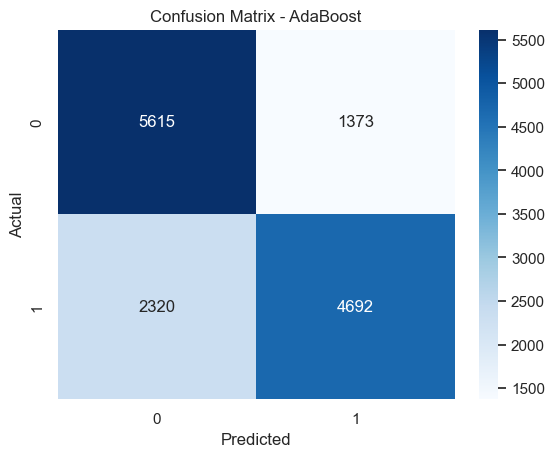

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      6988
           1       0.77      0.67      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [123]:
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_best))